# Поиск пиков сигнала

In [74]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 14

Есть некоторый сигнал $x(t)$, для которого мы имеем семплы в моменты времени $t_i = i\,\Delta t$ при $i=0,\ldots,n-1$:
$$
    x_i = x(t_i).
$$

Задача: по семплам $x_i$ приблизительно найти моменты времени $t$, для которых:
$$
    \frac{dx}{dt} = 0.
$$

Будем работать с центральными разностями:
$$
    \delta_{i+1/2} = x_{i + 1} - x_i, \quad i = 0,\ldots,n-2,
$$

$$
    \Delta_i = \delta_{i + 1/2} - \delta_{i - 1/2}, \quad i=1,\ldots,n-2.
$$

где $\delta_{i+1/2}$ и $\Delta_i$- первая и вторая разности, котрые аппроксимируют первую и вторую производную.

Оценить где производная меняет знак можно по произведению:
$$
    s_i = \delta_{i-1/2} \cdot \delta_{i+1/2},
$$
где $s_i < 0$ - там и меняет.

Вторую разность $\Delta_i$ исользуем для того, чтобы определять направленность пика: "отрицательный" при $\Delta_i > 0$ и положительный при $\Delta_i < 0$. Кроме того, её можно использовать для отсечения слишком "гладких" пиков, где вторая производная имеет маленькую величину по модулю.

Вот такая вот функция получается. Ищет только отрицательные пики: $\Delta_i >$ `threshold`. Чтобы найти положительные нужно умножить $x$ на $-1$.

In [76]:
def findpeaks(x, threshold=0):
    dx = diff(x)
    ddx = diff(dx)
    sgn = dx[1:] * dx[:-1]
    i, = where((sgn <= 0) & (ddx > threshold))
    return i + 1

Вспомогательная функция для демонстрации.

In [77]:
def plotpeaks(x, threshold=0):
    
    x = array(x)
    
    # отрицательные
    i = findpeaks(x, threshold)
    
    # положительные
    j = findpeaks(-x, threshold)
    
    plot(x, 'o-', label='исходный сигнал')
    plot(i, x[i], 'ko', label='отрицательные', ms=10)
    plot(j, x[j], 'ro', label='положительные', ms=10)
    
    ax = gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    legend()

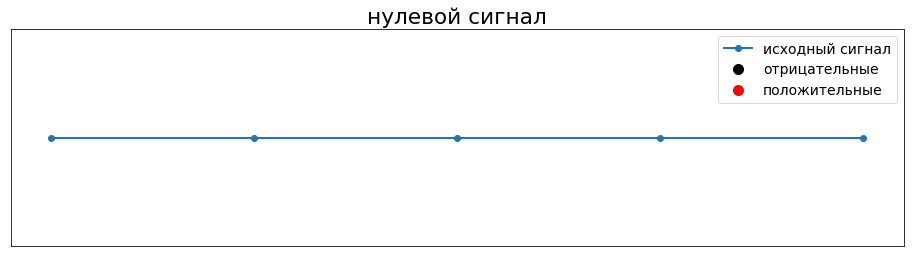

In [78]:
title('нулевой сигнал')
plotpeaks([0, 0, 0, 0, 0])

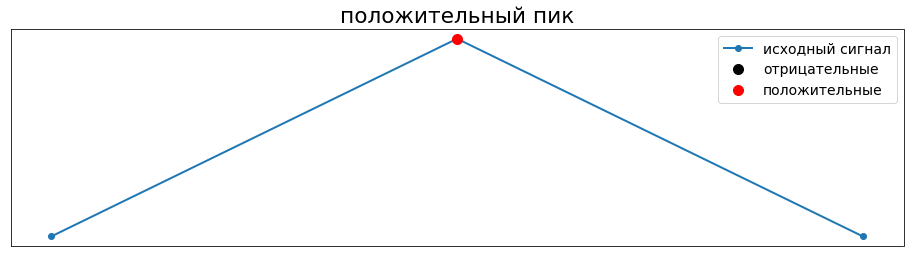

In [79]:
title('положительный пик')
plotpeaks([0, 1, 0])

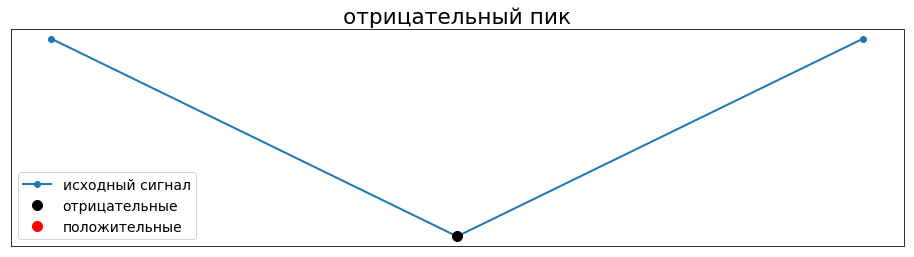

In [80]:
title('отрицательный пик')
plotpeaks([0, -1, 0])

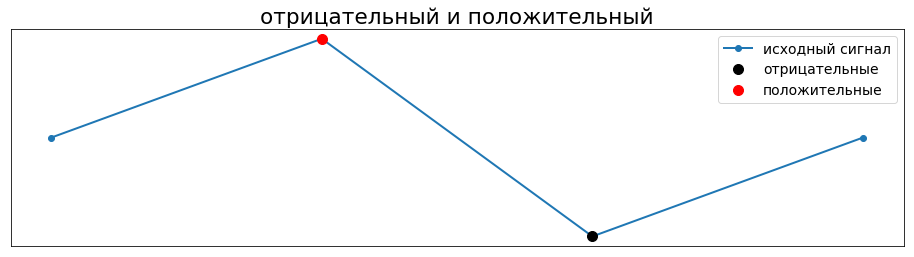

In [81]:
title('отрицательный и положительный')
plotpeaks([0, 1, -1, 0])

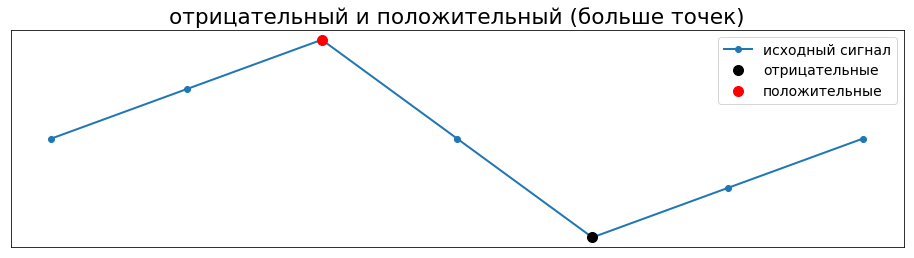

In [86]:
title('отрицательный и положительный (больше точек)')
plotpeaks([0, 0.5, 1, 0, -1, -0.5, 0])

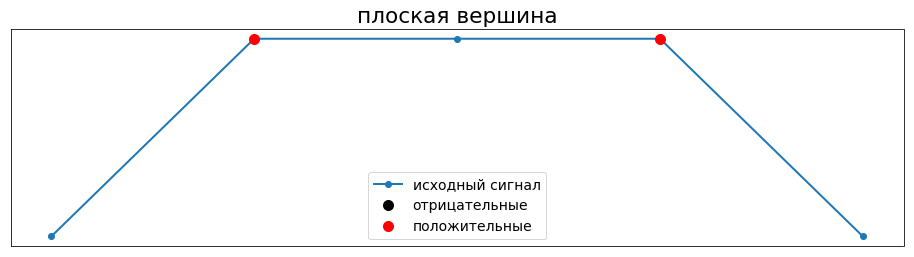

In [82]:
title('плоская вершина')
plotpeaks([0, 1, 1, 1, 0])

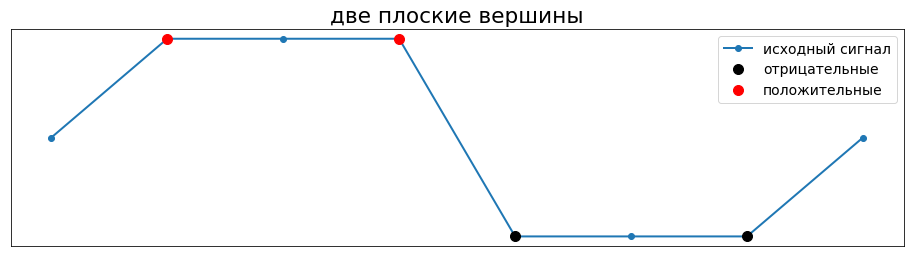

In [83]:
title('две плоские вершины')
plotpeaks([0, 1, 1, 1, -1, -1, -1, 0])

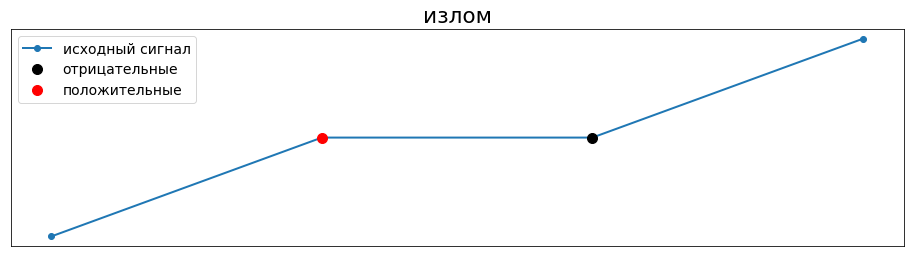

In [84]:
title('излом')
plotpeaks([0, 1, 1, 2])

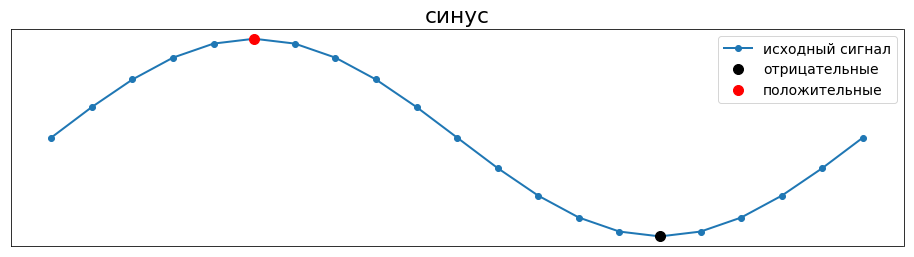

In [95]:
title('синус')
x = linspace(0, 2*pi, 21)
y = sin(x)
plotpeaks(y)